# Week 7 - 20th September, 2023

## 7.1
Use the csv/xls file assigned to you, build a Multiple Linear regression (MLR) model. If your input file has multiple outputs, build MLR model for each output separately. Select the features which are can be useful in building the model.

In [2]:
import pandas as pd

input_df = pd.read_csv('../pca-datasets/stud3.csv')
input_df.head(5)

,Sr,DSA,soft_skill,Bond-months
0,1,8,6,8.0
1,2,6,7,9.0
2,3,5,8,8.5
3,4,9,9,0.5
4,5,9,5,8.5


First, we remove the serial number column through brute force analysis.

In [3]:
filtered_df = input_df.drop(['Sr'], axis=1)

Let's also store the input features and output features in `X` and `Y` dataframes respectively.

To estimate the regression coefficient β₀, a constant term of 1 needs to be added as a separate column to `X`. As the value of the columns remains same across all samples, the parameter estimated for this feature or column will be the intercept term.

In [4]:
import statsmodels.api as sm
input_feature_df = filtered_df.drop(['Bond-months'], axis=1)
X = sm.add_constant(input_feature_df)
Y = filtered_df['Bond-months']

We will store the columns that are required for building the final model:

In [5]:
X_features = input_feature_df.columns
X_features

Index(['DSA', 'soft_skill'], dtype='object')

Now, we split the dataset into training and testing datasets.

In [6]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size=0.8, random_state=100)

`train_size` of 0.8 implies that 80% of the data is used for training the model and the remaining 20% is used for validating the model.

In [7]:
student_model = sm.OLS(train_y, train_x).fit()
student_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       1.000     
Dependent Variable:   Bond-months        AIC:                  -1575.0130
Date:                 2023-09-20 12:05   BIC:                  -1571.3563
No. Observations:     25                 Log-Likelihood:       790.51    
Df Model:             2                  F-statistic:          2.343e+31 
Df Residuals:         22                 Prob (F-statistic):   0.00      
R-squared:            1.000              Scale:                2.2805e-29
-------------------------------------------------------------------------
            Coef.  Std.Err.           t            P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
const      32.0000   0.0000 10022216081788090.0000 0.0000 32.0000 32.0000
DSA        -1.5000   0.0000 -3332502234315658.5000 0.0000 -1.5000 -1.5000
soft_skill -2.0000   0.0000 -3116359359975181.0000 0.0000 -2.0000 -2.0000
-------------------------------------------------------------------------
Omnibus:                 1.900           Durbin-Watson:             1.038
Prob(Omnibus):           0.387           Jarque-Bera (JB):          1.429
Skew:                    -0.389          Prob(JB):                  0.489
Kurtosis:                2.124           Condition No.:             29   
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

### Calculation of Variance Inflation Factor

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vi_factors(X):
    X_matrix = X.values
    vif = [ variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
    vi_factors = pd.DataFrame()
    vi_factors['column'] = X.columns
    vi_factors['VIF'] = vif
    return vi_factors

In [9]:
vi_factors = get_vi_factors(X[X_features])
vi_factors

,column,VIF
0,DSA,7.733768
1,soft_skill,7.733768


### Checking correlation of columns with large VIFs

In [12]:
columns_with_large_vif = vi_factors[vi_factors.VIF > 4].column
columns_with_large_vif

0           DSA
1    soft_skill
Name: column, dtype: object

As we can see, both of our input columns have large VIF

## 7.2
Among all input features, which features have symptoms of multi-collinearity and need to be removed from the model? After such removals, build the model again with reduced features and find its coefficients and R-square value.

Text(0.5, 1.0, 'Heatmap depicting correlation between features')

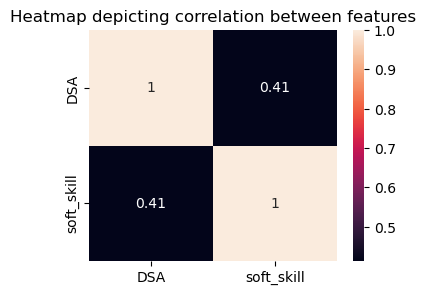

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (4, 3))
sn.heatmap(X[columns_with_large_vif].corr(), annot = True)
plt.title("Heatmap depicting correlation between features")

As we can see, the above heatmap shows that both our input features show symptoms of multi-collinearity. We will remove only one of them and build an SLR (MLR with one column technically) model

### Let's first do it for DSA:

In [20]:
import statsmodels.api as sm
input_feature_df = filtered_df.drop(['Bond-months'], axis=1)
X_feature_1 = sm.add_constant(filtered_df['DSA'])

In [22]:
from sklearn.model_selection import train_test_split

train_x_f1, test_x_f1, train_y_f1, test_y_f1 = train_test_split(X_feature_1, Y, train_size=0.8, random_state=100)

In [23]:
student_model_dsa = sm.OLS(train_y_f1, train_x_f1).fit()
student_model_dsa.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.784   
Dependent Variable: Bond-months      AIC:                129.4831
Date:               2023-09-20 12:20 BIC:                131.9208
No. Observations:   25               Log-Likelihood:     -62.742 
Df Model:           1                F-statistic:        87.98   
Df Residuals:       23               Prob (F-statistic): 2.52e-09
R-squared:          0.793            Scale:              9.6295  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     25.5292     1.5761   16.1974   0.0000   22.2687   28.7897
DSA       -2.2801     0.2431   -9.3797   0.0000   -2.7829   -1.7772
-----------------------------------------------------------------
Omnibus:               1.725        Durbin-Watson:          2.254
Prob(Omnibus):         0.422        Jarque-Bera (JB):       1.224
Skew:                  -0.294       Prob(JB):               0.542
Kurtosis:              2.090        Condition No.:          17   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

### Now let's do for soft skills

In [25]:
import statsmodels.api as sm
input_feature_df = filtered_df.drop(['Bond-months'], axis=1)
X_feature_2 = sm.add_constant(filtered_df['soft_skill'])

In [26]:
from sklearn.model_selection import train_test_split

train_x_f2, test_x_f2, train_y_f2, test_y_f2 = train_test_split(X_feature_2, Y, train_size=0.8, random_state=100)

In [27]:
student_model_dsa = sm.OLS(train_y_f2, train_x_f2).fit()
student_model_dsa.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.753   
Dependent Variable: Bond-months      AIC:                132.8360
Date:               2023-09-20 12:22 BIC:                135.2737
No. Observations:   25               Log-Likelihood:     -64.418 
Df Model:           1                F-statistic:        74.05   
Df Residuals:       23               Prob (F-statistic): 1.20e-08
R-squared:          0.763            Scale:              11.012  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         29.6729    2.1650  13.7060  0.0000  25.1943  34.1515
soft_skill    -3.1894    0.3706  -8.6052  0.0000  -3.9561  -2.4227
-----------------------------------------------------------------
Omnibus:              2.641        Durbin-Watson:           2.053
Prob(Omnibus):        0.267        Jarque-Bera (JB):        2.276
Skew:                 0.662        Prob(JB):                0.321
Kurtosis:             2.342        Condition No.:           20   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

## Analysis

Both SLRs give us a poorer R-square value (0.753 and 0.784) as compared to an R-square value of 1.000 in the original input dataset.

## 7.3
Find the outliers in your dataset using leverage value. Identify the corresponding observations in the input file and remove those. Now re-train the model and conduct the residual analysis and test for homoscedasticity.

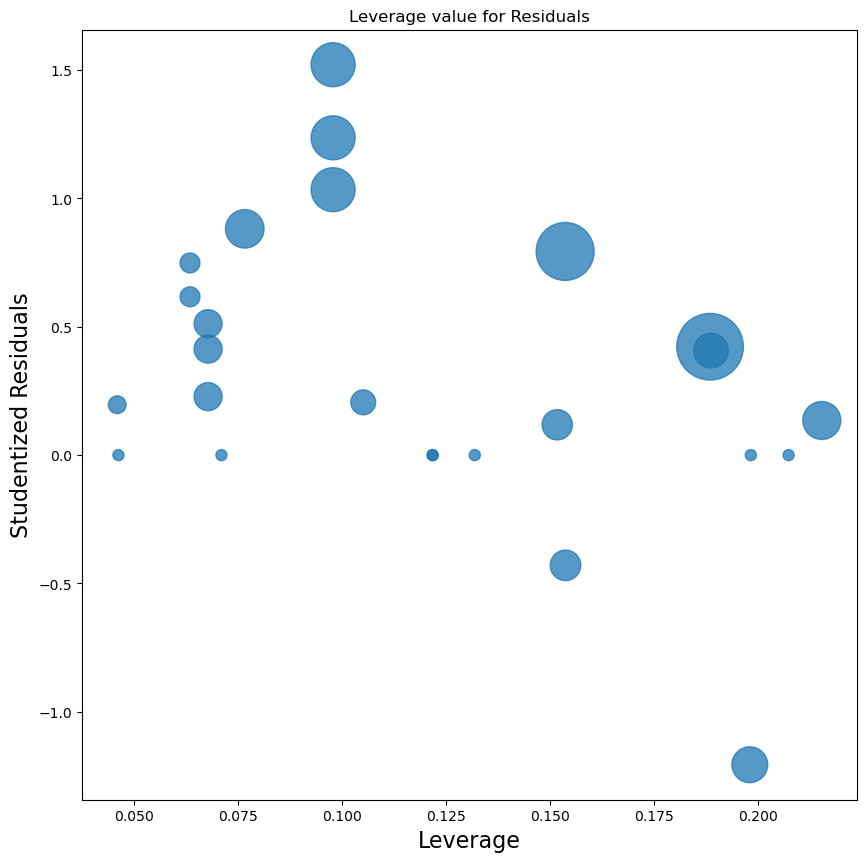

In [18]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(10,10))
influence_plot(student_model, ax = ax)
plt.title("Leverage value for Residuals")
plt.show()